In [1]:
# Stephen.Griffies@noaa.gov 

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid
import numpy as np
import seaborn as sns
import pandas as pd
import cmocean
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mplsettings     # from https://github.com/jkrasting/mplsettings

import cartopy.crs as ccrs

%matplotlib inline

In [3]:
dirstix = "../../common/static_ttf"
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

In [4]:
# static file 

fname_static = "../../common/CM4X_p125/ocean_annual.static.nc"
#fname_static = "/net/smg/OWG/CM4_highres/grids/p125/ocean_annual.static.nc"
static       = xr.open_mfdataset(fname_static, chunks={'time': 1}, combine='by_coords')
#static       = static.assign_coords({'geolon': xmodel_h, 'geolat': ymodel_h})

areacello    = static['areacello']
wet          = static['wet']
area         = areacello*wet
areatotal    = area.sum(dim=["xh", "yh"])
weight       = area/areatotal
geolon       = static['geolon']
geolat       = static['geolat']
dxCu         = static['dxCu']
dxCv         = static['dxCv']
dxt          = static['dxt']
dyt          = static['dyt']

In [5]:
ds25    = xr.open_mfdataset('CM4Xp25_grad_zos_daily.nc')
ds25    = ds25.rename_vars({"__xarray_dataarray_variable__": "grad_zos_p25"})
grad_zos_p25 = ds25['grad_zos_p25']

ds125    = xr.open_mfdataset('CM4Xp125_grad_zos_daily.nc')
ds125    = ds125.rename_vars({"__xarray_dataarray_variable__": "grad_zos_p125"})
grad_zos_p125 = ds125['grad_zos_p125']

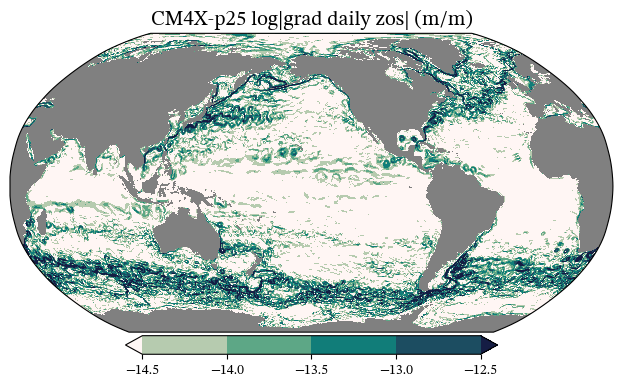

In [6]:
#map grad 
field = np.log(grad_zos_p25)
vmin=-15
vmax=-12
levels = np.arange(-14.5,-12,.5)

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=field.plot(ax=axis, x="geolon", y="geolat",
             levels=levels,
             transform=ccrs.PlateCarree(), cmap=cmocean.cm.tempo,
                           add_colorbar=False
            )
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=12) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('CM4X-p25 log|grad daily zos| (m/m)', fontsize=15)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', extend='both', shrink=0.6,orientation='horizontal')

plt.tight_layout()
plt.show()
fig.savefig('Fig02_CM4Xp25_gradzos_daily_glb.jpg', bbox_inches='tight', dpi=400, format='jpeg')

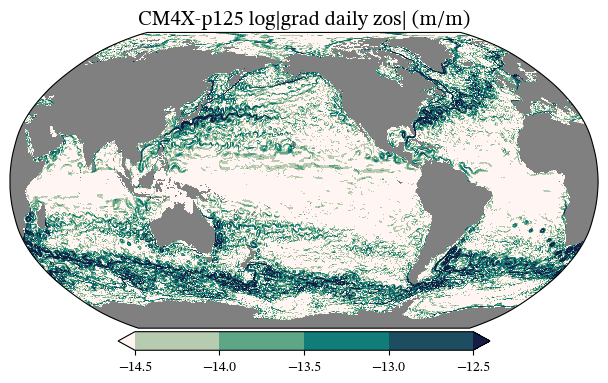

In [8]:
#map grad 
field = np.log(grad_zos_p125)
vmin=-15
vmax=-12
levels = np.arange(-14.5,-12,.5)

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=field.plot(ax=axis, x="geolon", y="geolat",
             levels=levels,
             transform=ccrs.PlateCarree(), cmap=cmocean.cm.tempo,
                           add_colorbar=False
            )
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=12) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('CM4X-p125 log|grad daily zos| (m/m)', fontsize=15)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', extend='both', shrink=0.6,orientation='horizontal')

plt.tight_layout()
plt.show()
fig.savefig('Fig02_CM4Xp125_gradzos_daily_glb.jpg', bbox_inches='tight', dpi=400, format='jpeg')